# Classification Example - Iris Flower Dataset

Iris flower data set used for multi-class classification.

![image](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.svm import SVC


## 1. Data Collection

Downloaded from Kaggle: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [5]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2. Data Exploration and Preparation

#### Data Exploration

In [111]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


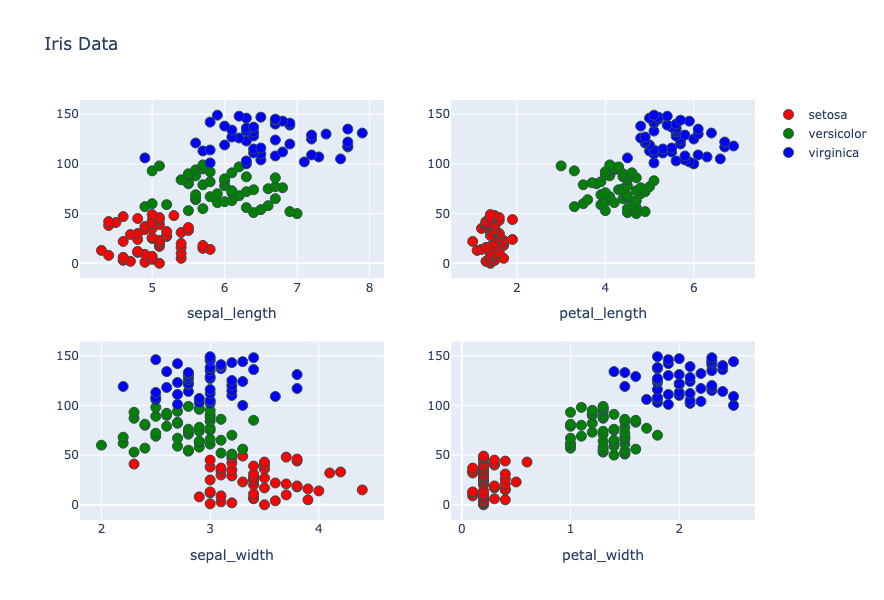

In [80]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2)

# Create a color dictionary for each species
color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Add scatter plots to each subplot
for i, variable in enumerate(['sepal_length', 'petal_length', 'sepal_width', 'petal_width']):
    for species, color in color_dict.items():
        fig.add_trace(
            go.Scatter(
                x=df[df['species'] == species][variable],
                y=df[df['species'] == species].index,
                mode='markers',
                marker=dict(
                    color=color, # map species to colors
                    size=10,
                    line=dict(
                        width=1,
                        color='DarkSlateGrey'
                    )
                ),
                showlegend=False,
                hovertemplate = f"{species}<br>{variable}: %{{x}}<br>Index: %{{y}}"
            ),
            row=i//2 + 1,
            col=i%2 + 1
        )

    # Add x-axis label to each subplot
    fig.update_xaxes(title_text=variable, row=i//2 + 1, col=i%2 + 1)

# Add a trace for each species just for the legend
for species, color in color_dict.items():
    fig.add_trace(
        go.Scatter(
            x=[None], 
            y=[None],
            mode='markers',
            marker=dict(
                color=color,
                size=10,
                line=dict(
                    width=1,
                    color='DarkSlateGrey'
                )
            ),
            name=species,
            showlegend=True
        )
    )


# Update layout
fig.update_layout(
    width=800,
    height=600,
    title="Iris Data"
)

# Show the plot
fig.show()

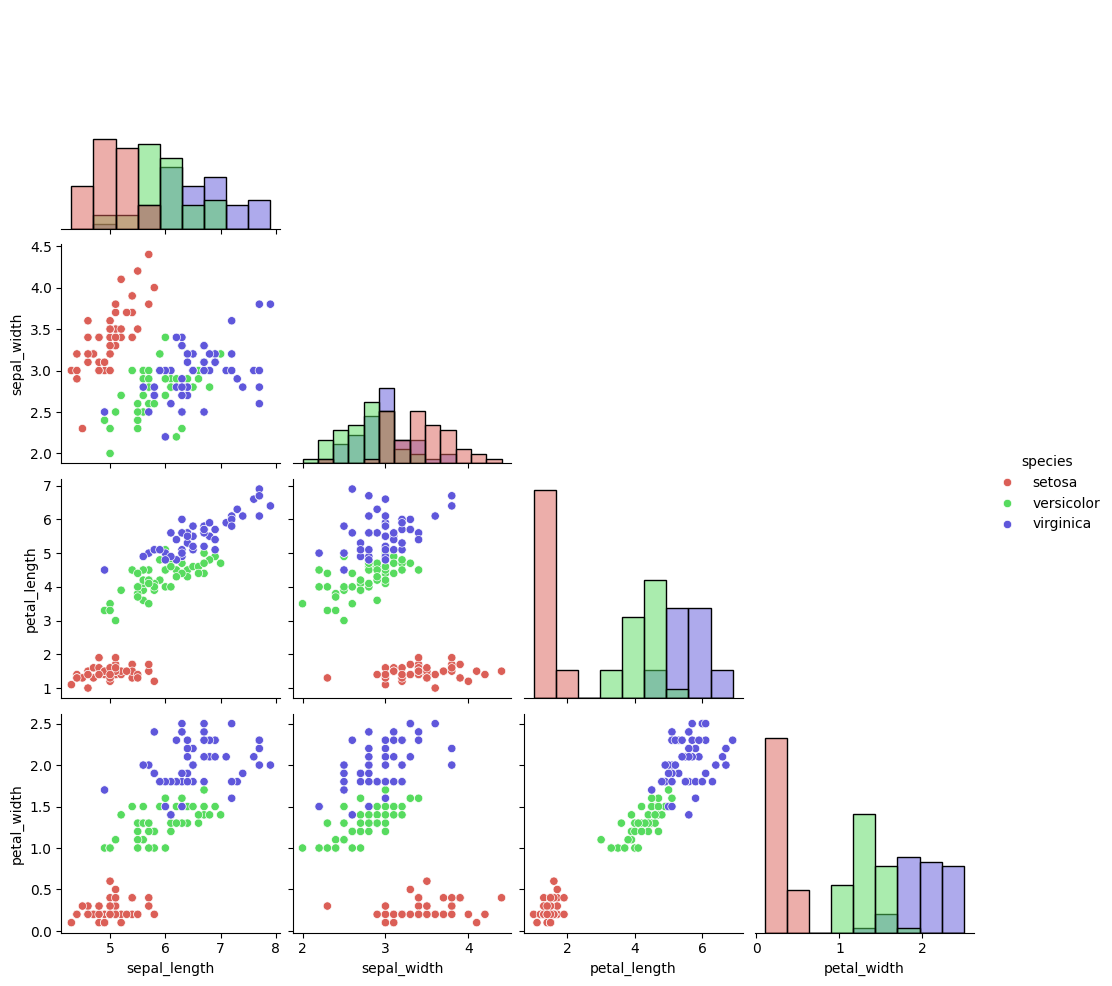

In [81]:
sns.pairplot(df,
    hue='species',
    diag_kind="hist",
    corner=True,
    palette='hls'
)

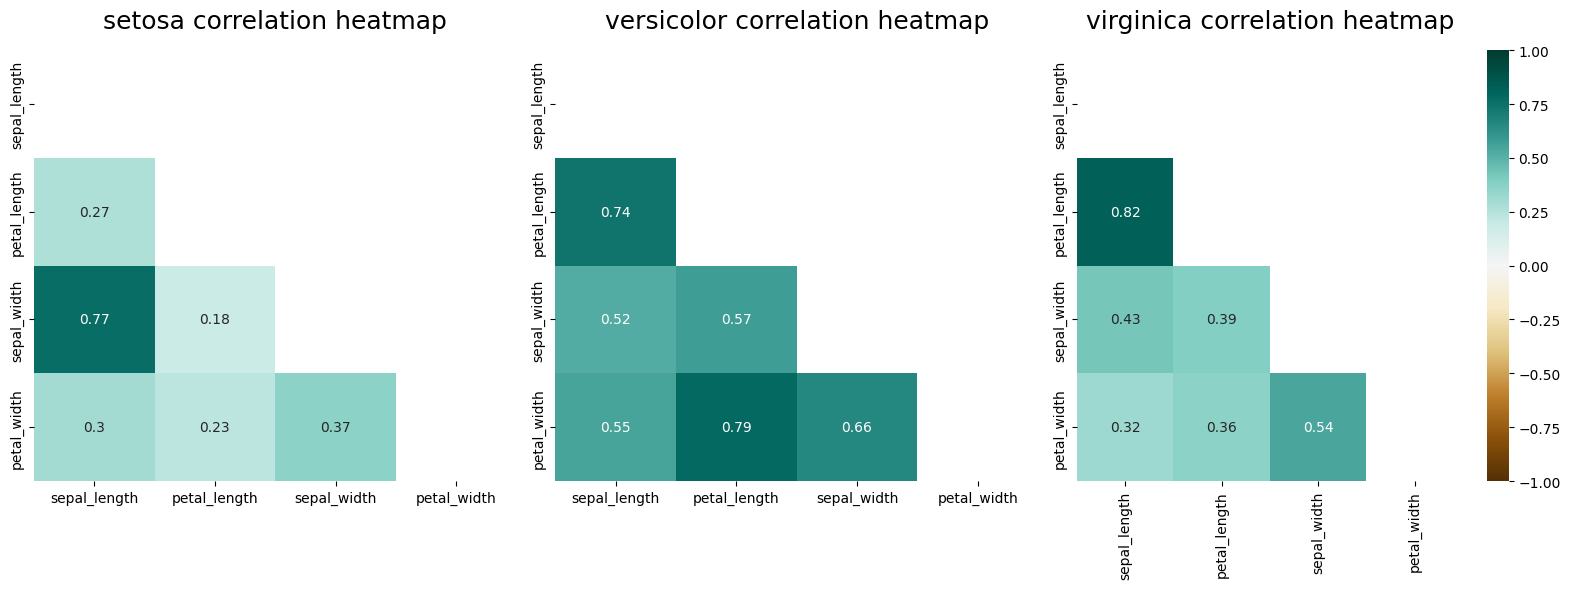

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

species = ['setosa', 'versicolor', 'virginica']
for i, ax in enumerate(axs):
    df_species = df[df["species"] == species[i]]
    mask = np.triu(
        np.ones_like(
            df_species[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']].corr(method = "spearman"),
            dtype = bool
        )
    )
    heatmap = sns.heatmap(
        df_species[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']].corr(method = "spearman"),
        mask = mask,
        vmin = -1,
        vmax = 1,
        annot = True ,
        cmap="BrBG",
        cbar=True if i == 2 else False,
        ax=ax
    )
    heatmap.set_title(
        f"{species[i]} correlation heatmap",
        fontdict = {'fontsize': 18},
        pad =16
    )

plt.tight_layout()
plt.show()

#### Data Preparation/Cleaning

Not necessary because it comes clean from Kaggle

## 3. Split Data into Training and Test Sets

In [149]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'petal_length', 'sepal_width', 'petal_width']].values,
    df["species"].values,
    test_size=0.2,
    random_state=42
)

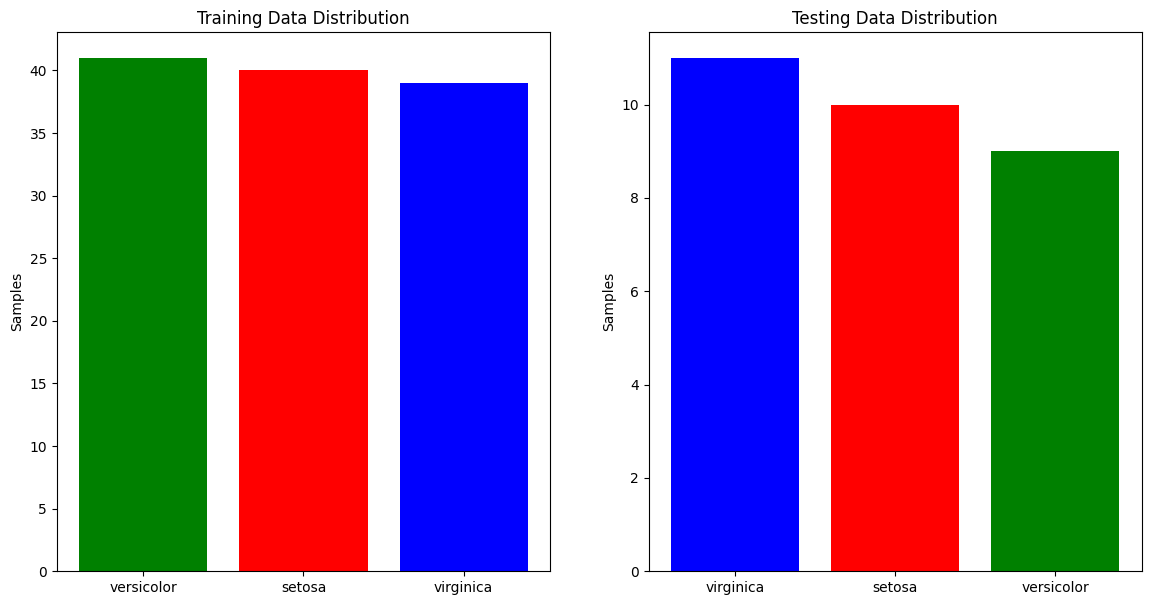

In [150]:
# Define the color dictionary
color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Convert the target variables to pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Get the distribution of the training and testing data
train_distribution = y_train_series.value_counts()
test_distribution = y_test_series.value_counts()

# Create a subplot with 2 columns (for training and testing data)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot the distribution of the training data
axs[0].bar(
    train_distribution.index,
    train_distribution.values,
    color=[color_dict[i] for i in train_distribution.index]
)
axs[0].set_title('Training Data Distribution')
axs[0].set_ylabel('Samples')

# Plot the distribution of the testing data
axs[1].bar(
    test_distribution.index,
    test_distribution.values,
    color=[color_dict[i] for i in test_distribution.index]
)
axs[1].set_title('Testing Data Distribution')
axs[1].set_ylabel('Samples')

# Display the plot
plt.show()

## 4. Choose an algorithm

### k-Nearest Neighboor (kNN)

![image](https://insightimi.files.wordpress.com/2020/03/knn-start.png)

For classification tasks, the k-nearest neighbors (KNN) algorithm works as follows:

1. It calculates the distance (e.g. Euclidean, Manhattan) between a new data point and all the training data points.
2. It selects the k closest training data points to the new point based on the calculated distances. The value of k is a user-defined parameter.
3. It assigns the new data point to the class that is most frequent among the k nearest neighbors (majority vote).

The key aspects are:
- It is a non-parametric, lazy learning algorithm that makes predictions based on similarity with training data.
- The choice of k and distance metric significantly impacts performance. Smaller k can lead to overfitting, larger k to underfitting.
- It works well for problems with irregular decision boundaries but can be computationally expensive for large datasets.

For example, if k=3 and the 3 nearest neighbors of a new point belong to classes A, B, and A respectively, the new point would be classified as A based on the majority vote



### Support Vector Machine (SVM)

The key idea behind SVM is to find the best decision boundary or hyperplane that separates the classes with maximum margin. The data points closest to this hyperplane are called support vectors.

- For linearly separable data, SVM finds the optimal hyperplane that maximizes the distance between the closest data points from each class (support vectors) and the hyperplane itself.

- For non-linear data, SVM maps the data into a higher dimensional space using kernel functions like polynomial, radial basis function (RBF), etc. This allows it to find a separating hyperplane in the higher dimensional space, which corresponds to a non-linear decision boundary in the original input space.

- The hyperplane is oriented such that the margin between the support vectors and itself is maximized. This margin maximization principle helps SVM achieve good generalization performance on unseen data

The goal of SVM for classification is to find the optimal hyperplane that maximizes the margin between the classes. The hyperplane is defined by the equation:

\begin{equation*}
w^T x + b = 0
\end{equation*}

Where:
- $w$ is the normal vector to the hyperplane
- $x$ is the input data point
- $b$ is the bias or offset parameter

The objective is to maximize the margin (M) between the two classes, which is the distance between the closest data points (support vectors) and the hyperplane.

\begin{equation*}
M = \frac{2}{||w||}
\end{equation*}

To find the optimal hyperplane, we need to minimize $||w||$ subject to the constraint that all data points are classified correctly:

\begin{equation*}
\begin{aligned}
&\min \frac{1}{2} \|w\|^2\\
&\text{subject to: } y_i(w^T x_i + b) \geq 1, \quad \forall i
\end{aligned}
\end{equation*}

Where $y_i$ is the class label (-1 or 1) for the i-th data point.

This optimization problem can be solved using Lagrange multipliers and the kernel trick for non-linear data.

#### Kernel Trick

For non-linear data, SVM maps the input data into a higher dimensional feature space using a kernel function $K(x_i, x_j)$.

The decision function then becomes:
\begin{equation*}
f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b\right)
\end{equation*}

Where $a_i$ are the Lagrange multipliers, and only the support vectors have non-zero $a_i$ values.

Common kernel functions include:
- Linear: $K(x_i, x_j) = x_i^T x_j$
- Polynomial: $K(x_i, x_j) = (x_i^T x_j + 1)^d$
- Radial Basis Function (RBF): $K(x_i, x_j) = e^{-\gamma ||x_i - x_j||^2}$

In summary, SVM finds the optimal hyperplane or regression function by maximizing the margin or minimizing the epsilon-insensitive loss, respectively, using Lagrange multipliers and kernel functions for non-linear data.

## 5. Train the model

### kNN

Instance-based learning does not create a generalized model but uses specific instances from the training data to classify new data points during the testing phase.

In [151]:
k = 4

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt( np.sum( (x1 - x2)**2 ) )

def predict(xtest):
    # Compute distances between x and all examples in the training set
    distances = [euclidean_distance(xtest, xtrain) for xtrain in X_train]
    
    # Sort by distance and return indices of the first k neighbors
    k_indices = np.argsort(distances)[:k]
    
    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [y_train[i] for i in k_indices]
    
    # Return the most common class label
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

pred_labels_knn = [predict(xtest) for xtest in X_test]

#### SVM

In [189]:
svm = SVC(
    C=1.0,
    kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0
)
svm.fit(X_train, y_train)
pred_labels_svm = svm.predict(X_test)

In [194]:
print(f"w = {svm.coef_}\n")
print(f"b = {svm.intercept_}\n")

print("Indices of support vectors")
print(svm.support_)
print("")

print("Support vectors")
print(svm.support_vectors_)
print("")

print("Number of support vectors for each class")
print(svm.n_support_)
print("")

print("Coefficients of the support vector in the decision function")
print(np.abs(svm.dual_coef_))

w = [[-0.04631136 -1.0030165   0.52105578 -0.46411816]
 [-0.00641373 -0.5389119   0.17867392 -0.29158729]
 [ 0.56766907 -2.03626115  1.21519237 -1.70330734]]

b = [1.45338269 1.50537328 5.8028791 ]

Indices of support vectors
[ 31  33  91  22  45  54  59  60  62  73  79  80 105 110   5  16  30  42
  68  81  87 101 112 113 116]

Support vectors
[[4.8 1.9 3.4 0.2]
 [5.1 1.7 3.3 0.5]
 [4.5 1.3 2.3 0.3]
 [5.6 4.5 3.  1.5]
 [5.4 4.5 3.  1.5]
 [6.7 5.  3.  1.7]
 [5.9 4.8 3.2 1.8]
 [5.1 3.  2.5 1.1]
 [6.  5.1 2.7 1.6]
 [6.3 4.9 2.5 1.5]
 [6.1 4.7 2.9 1.4]
 [6.5 4.6 2.8 1.5]
 [6.9 4.9 3.1 1.5]
 [6.3 4.4 2.3 1.3]
 [6.3 5.  2.5 1.9]
 [6.3 5.1 2.8 1.5]
 [6.3 4.9 2.7 1.8]
 [6.  4.8 3.  1.8]
 [6.  5.  2.2 1.5]
 [6.2 4.8 2.8 1.8]
 [6.5 5.2 3.  2. ]
 [7.2 5.8 3.  1.6]
 [5.6 4.9 2.8 2. ]
 [5.9 5.1 3.  1.8]
 [4.9 4.5 2.5 1.7]]

Number of support vectors for each class
[ 3 11 11]

Coefficients of the support vector in the decision function
[[0.         0.67061613 0.07718561 0.         0.         0.
  0.

## 6. Evaluate Model Performance

In [195]:
print(classification_report(y_test, pred_labels_svm))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



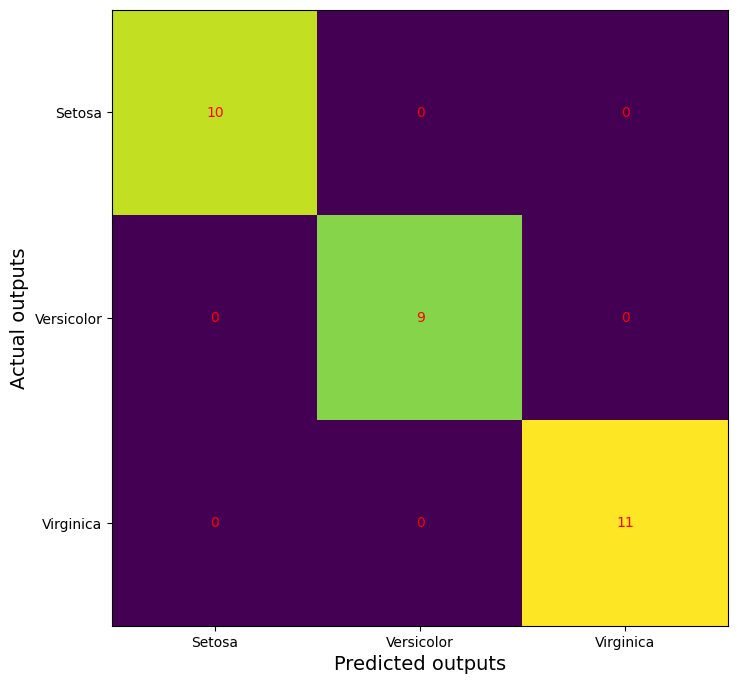

In [196]:
cm = confusion_matrix(y_test, pred_labels_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)

# Add labels for x-axis and y-axis
labels = ['Setosa', 'Versicolor', 'Virginica']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

## 7. Model Tuning and Selection

#### kNN

In this case, if the performance was suboptimal then we could tweak the hyperparameter k. But since it got all the testing data, correct - we don't need to do anything.

#### SVM

Parameters that can be tweaked:
- **C**: It is the regularization parameter, C, of the error term.
- **kernel**: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.
- **degree**: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.
- **gamma**: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.